Importing relevant packages

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

Downloading and unzipping the dataset

In [2]:
# # Downloading dataset
# !wget https://data-flair.s3.ap-south-1.amazonaws.com/Data-Science-Data/NSE-Tata-Global-Beverages-Limited.zip -O Dataset.zip
    
# # Unzipping
# !unzip Dataset.zip -d Dataset

In [3]:
df = pd.read_csv("Dataset/NSE-Tata-Global-Beverages-Limited.csv")
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55


Declaring the index column and transforming it to datetime format

In [4]:
df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.index = df["Date"]

Plotting the closing price

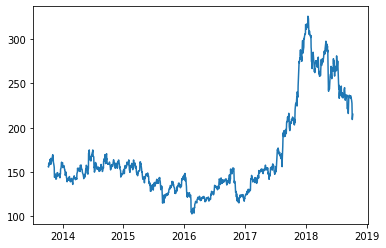

In [5]:
plt.plot(df["Close"], label = "Closing Price")
plt.show()

Sorting the dataset using the date time and filter Date and Close columns

In [10]:
data = df.sort_index(ascending = True, axis = 0)
new_dataset = pd.DataFrame(index = range(0, len(df)), columns = ["Date", "Close"])
new_dataset["Date"] = data["Date"].values[:]
new_dataset["Close"] = data["Close"].values[:]
new_dataset.head()

,Date,Close
0,2013-10-08,155.80
1,2013-10-09,155.55
2,2013-10-10,160.15
3,2013-10-11,160.05
4,2013-10-14,159.45


Normalizing the new dataset that has the Date and Closing Price

In [11]:
scaler = MinMaxScaler(feature_range = (0, 1))
final_dataset = new_dataset.values

#80% training set and 20% validation set

train_set = final_dataset[0:int(0.8*len(final_dataset)),:]
valid_set = final_dataset[int(0.8*len(final_dataset)):,:]
print(len(train_set), len(valid_set))

988 247


In [12]:
new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis = 1, inplace = True)

scaled_data = scaler.fit_transform(new_dataset)